In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import math

In [56]:
df_cog = pd.read_csv('Cognizant share prices 2019_2021.csv',index_col=0)

<AxesSubplot:title={'center':'Cognizant Close'}, xlabel='Date'>

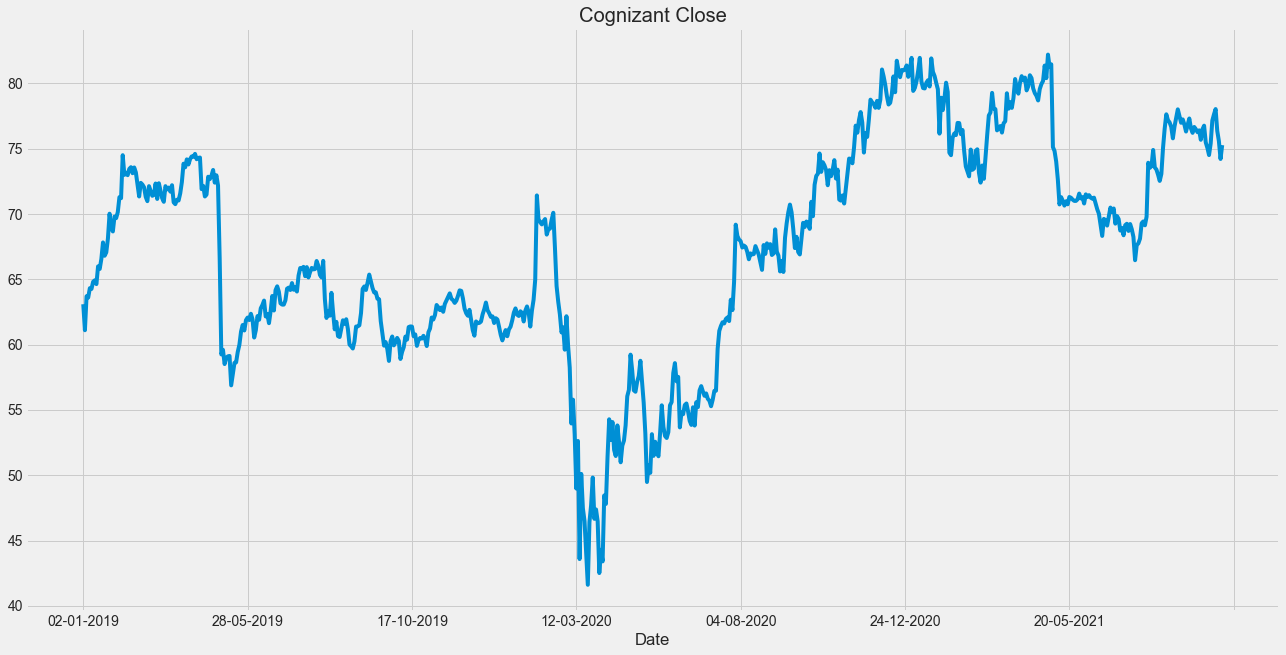

In [57]:
df_cog['Close'].plot(figsize=(20,10),title='Cognizant Close')

In [58]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split

In [59]:
n = len(df_cog)
print(n)
print(df_cog['Close'].values[0])

694
63.09


In [66]:
#n_r =math.ceil(0.8*n)
df_fin = df_cog['Close'].head(n).values
X = []
y = []
for i in range(n_r-2):
    X.append(df_fin[i:i+2])
    y.append(df_fin[i+2])
    
X = np.array(X)
y = pd.DataFrame(y)
#print(X)
#print(y)

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
reg_cog = XGBRegressor(objective='reg:squarederror')

In [73]:
reg_cog.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
preds = reg_cog.predict(X_test)

In [75]:
print(f"Mean Squared Error is :{mean_squared_error(preds,y_test)}")

Mean Squared Error is :15.69859914113791


Text(0.5, 1.0, 'Cognizant Prediction')

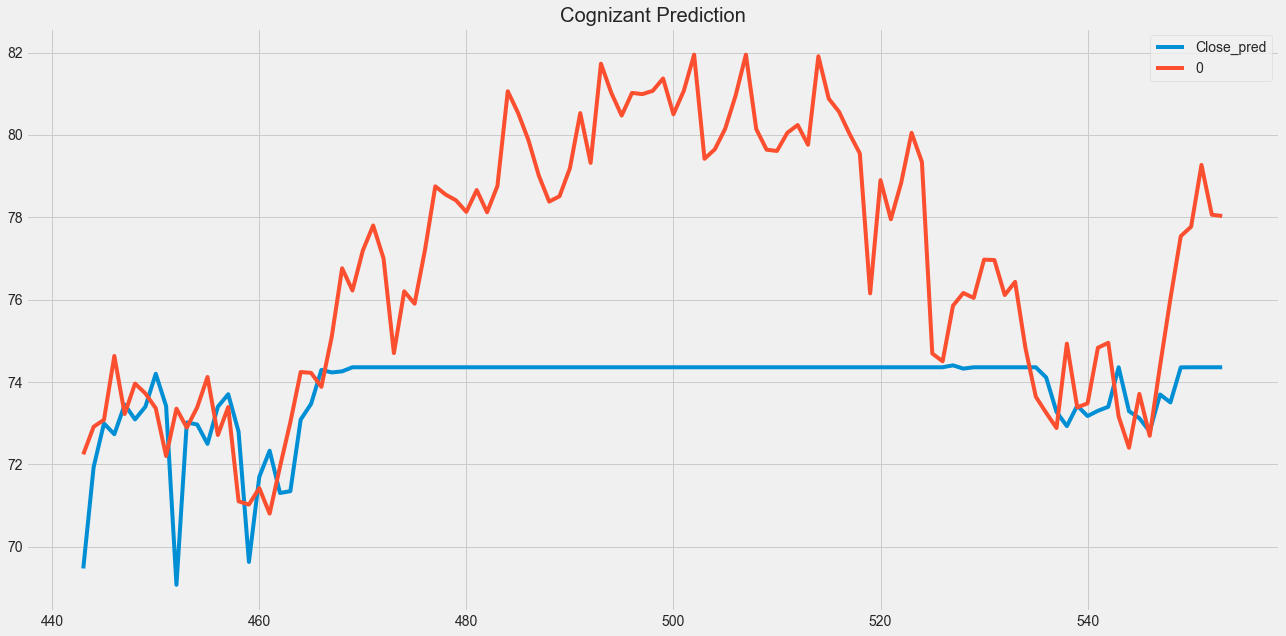

In [76]:
preds_df = pd.DataFrame(preds)
preds_df.columns=['Close_pred']
preds_df.index = y_test.index
ax = preds_df.plot(figsize=(20,10))
y_test.plot(ax = ax)
plt.title("Cognizant Prediction")